  EDA: Current project 32 unique users. Plot out Distribution of number tweets for each user. 
  
  Bar plot for distribution of number tweets per user.

Height of bar should be number of tweets they have.
 
 Some users have less than 100 tweets, drop these users.Drop less than 10k users. 
 
 Further look at userid, and tweet text. Look at text part and then figure process(bag of 
 
 words)
 
 Use this as X. Use this in train test split.
 
 Try first naive bayes model in skilearn for labels. Then print out metrics.
 
 after:
 Decision Tree simple(default parameters)
 
 Gausian Bayes:
 
 Look into what it actually does
 
 then calculate accuracy score.
 
 Use cross validation. Five folds. 
 
 If you need go back to lecture(solution in solution sheet for how to do all this).
 
 Don't use max features
 
 Look into functions. Understand what expected output should be.
 
 Learn Acronyms.
  
  In guide sent by flora, replace count vectorizer with tfidf. 
  
  if i have time, look at Naive Bay. Multiclass?
  
  y = must be string or object
  
  
  
  
Go back to NLP week and try and do assignment. Individual and pair assignment and compare to 

solution.  
  
  Floras last words:
  
  Be patient and go deep. Make sure each step, "what am I doing?"
  
  Always check. 'Wait a second let me check.'
  
  Use weekend pace yourself. Back up what you say. If you say you understand the topic 
  
  modeling understand everything. If you say you understand tfidf no the acronym. 
  
  Go back to lecture and really own it. "If asked to give lecture on Bayes, be able to, own 
  
  it".
  
  Saturday: 8pm. show what file worked on. 
  
  Flora: "why are they taking this step, why this assumption, purpose of this step?"
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tag import StanfordNERTagger
from nltk.tokenize import sent_tokenize
from nltk.tokenize import sent_tokenize


import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk import word_tokenize, pos_tag
from nltk.tag import StanfordNERTagger
from sklearn.linear_model import RidgeClassifier
# from tweetokenize import Tokenizer


import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from nltk.tag.stanford import StanfordNERTagger
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
from autocorrect import spell

import re
import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import pandas as pd
from nltk.util import skipgrams
from itertools import chain
from scipy.cluster import hierarchy


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessandro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessandro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load in Data

In [11]:
df = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Inspecting userids

In [3]:
df.userid.value_counts()

568620329                                       43231
801485278858854401                              39421
801200139155214336                              34912
801555575687495681                              33503
801463213833547776                              32870
751630413769113601                              31657
751635009052827648                              31073
881675624401833984                              27436
761401522798333952                              27209
892133369965944833                              26370
769380097359024128                              26136
768237282562310144                              26020
896121971989262336                              25472
778257194076831744                              22624
741092772233482241                              16400
801221525718335488                              12618
772513370599747585                              12099
801442896041873409                              12025
741112500356276225          

In [4]:
df.user_screen_name.value_counts()

NoticiasViralTV                                 43231
EvelynWhiteGOP                                  39421
TrumpNewsz                                      34912
TrumpDailyNewss                                 33503
TrumpNewsDaily_                                 32870
AriaWilsonGOP                                   31657
CarolineWalkerB                                 31073
DTrumpTrain_                                    27436
AbbyMartinM                                     27209
Laureen4Trump                                   26370
TrumpTrainNewss                                 26136
GODBLESSAMERIC                                  26020
EmmaTurnerBN                                    25472
America4Trump_                                  22624
LaurenJonesGOP                                  16400
AlyssaNelsonR                                   12618
Sophia4Trump                                    12099
SamanthaClarkH                                  12025
SophiaMillerC               

In [5]:
len(df.user_screen_name)

569455

# Taking out retweets and non English tweets

In [13]:
tweets_mask = df['is_retweet'] == False
tweets = df[tweets_mask]

tweets_english = tweets[tweets['tweet_language'] == 'en']

# Dropping Users with less than 10,000 tweets

In [14]:
data = tweets_english[['user_screen_name','tweet_text']]
data =data[data.user_screen_name != 'CarolineWB_']
data =data[data.user_screen_name != '55DeTN4VJIeKfM9Atr0sSTLomZbJyUWuBNdDK2an1nE=']
data =data[data.user_screen_name != 'TDgi60XrT+ylS+rVJEMhb4Y2qzW2HnZmlijAyHNqavc=']
data =data[data.user_screen_name != '944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=']
data =data[data.user_screen_name != 'UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=']
data =data[data.user_screen_name != 'MUqZv6hxFW92V7lxJyf35c8BU8esdxS6IoV1QGiwwtQ=']
data =data[data.user_screen_name != 'TRUMPTRAIN_17']
data =data[data.user_screen_name != '_trumpnews_']
data =data[data.user_screen_name != 'EAMY+7SRc0r53i1vfKV4UvVAc+DAI4rtEpUjFSbwbQ=']
data =data[data.user_screen_name != 'AnnabelleBakerF']
data =data[data.user_screen_name != 'BreakingNewsDJT']
data =data[data.user_screen_name != 'Citizens4Trump_']
data =data[data.user_screen_name != 'NoticiasViralTV']







In [8]:
len(data.user_screen_name.value_counts())

20

In [15]:
data.tweet_text

1         BREAKING: Air Force Makes Tragic Announcement,...
2         HAPPENING NOW: Disney Facing a Scandal So Cata...
3         Another Stupid Gun Control Cartoon From the Le...
4         ➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5         Michael Moore Offers to Pay $1,000 Fine for El...
6         Nancy Pelosi to Continue to Lead House Democra...
7         WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8         Stupid Hillary Gives Away Mosul Strategy, ISIS...
9         HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10        Former CIA Director Said More Than 1 Country C...
11        WATCH – Country Singer Ray Stevens Releases TH...
12        "Trey Gowdy Just Made A Major Move To Stop Oba...
13        "ALERT: Top Anti-Trump Republican Took Money F...
14        KNOCK-KNOCK: Look Who Just Got a Visit From th...
15        "Lawrence: Hurricane Irma And Harvey Were The ...
16        LIVE STREAM VIDEO: Roger Stone Associate Jacob...
17        New Speaker Pelosi Refuses to 

In [10]:
all_nighter = data

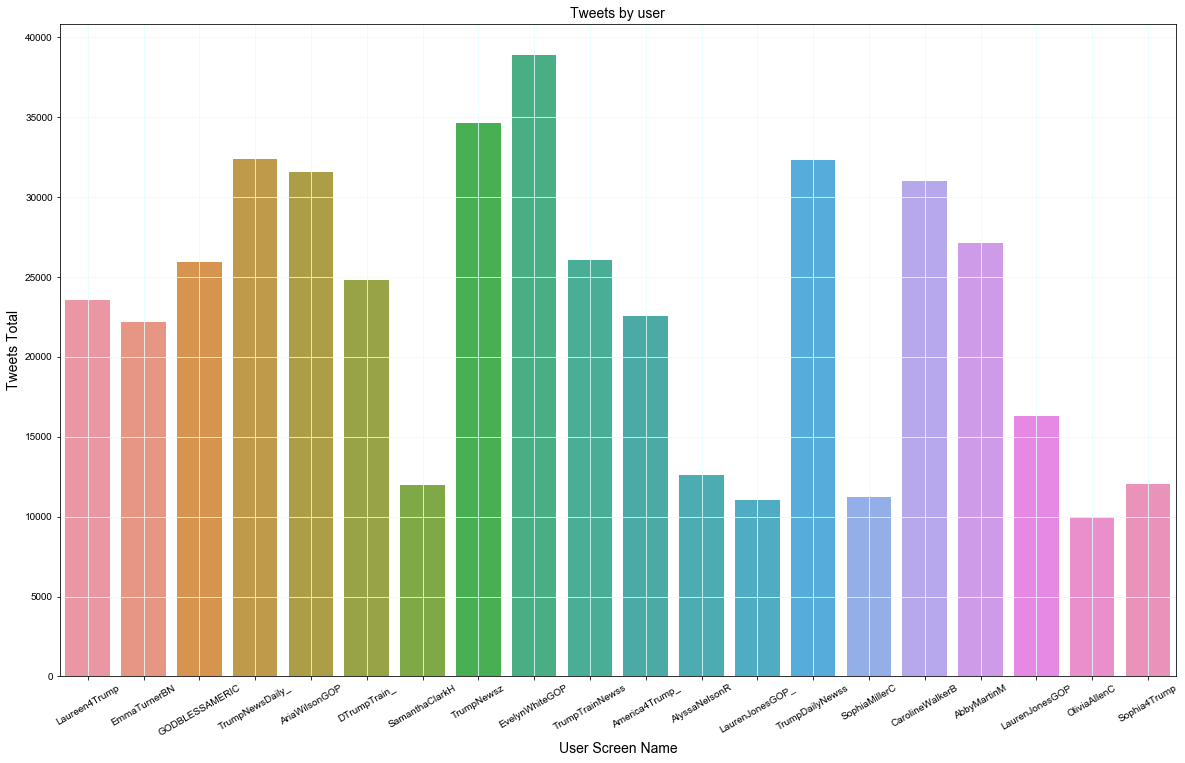

In [11]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='user_screen_name', data=data)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('User Screen Name', fontsize = 14)
plt.title('Tweets by user', fontsize = 14)
plt.grid(c = 'lightcyan')

# import seaborn as sns
# planets = sns.load_dataset("planets")
# g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


plt.show ()

In [12]:
data_toy = data[:500]
data_toy

,user_screen_name,tweet_text
1,Laureen4Trump,"BREAKING: Air Force Makes Tragic Announcement,..."
2,Laureen4Trump,HAPPENING NOW: Disney Facing a Scandal So Cata...
3,EmmaTurnerBN,Another Stupid Gun Control Cartoon From the Le...
4,GODBLESSAMERIC,➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5,GODBLESSAMERIC,"Michael Moore Offers to Pay $1,000 Fine for El..."
6,GODBLESSAMERIC,Nancy Pelosi to Continue to Lead House Democra...
7,GODBLESSAMERIC,WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8,GODBLESSAMERIC,"Stupid Hillary Gives Away Mosul Strategy, ISIS..."
9,GODBLESSAMERIC,HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10,GODBLESSAMERIC,Former CIA Director Said More Than 1 Country C...


# Processing Tweets to do Train Test Split

In [13]:
from autocorrect import spell


In [14]:



# data1 = []

# for i in range(data_toy.shape[0]):
#     tweet = data.iloc[i, 1]

#     # remove non alphabatic characters
#     tweet = re.sub('[^A-Za-z]', ' ', tweet)

#     # make words lowercase, because Go and go will be considered as two words
#     tweet = tweet.lower()

#     # tokenising
#     tokenized_tweet = wt(tweet)

#     # remove stop words and stemming
 
#     tweet_processed = []
#     for word in tokenized_tweet:
#         if word not in set(stopwords.words('english')):
#             tweet_processed.append(spell(stemmer.stem(word)))

#     tweet_text = " ".join(tweet_processed)
#     data1.append(tweet_text)


In [15]:
df.dropna(inplace=True)


In [16]:
data.shape

(458305, 2)

In [17]:
### Creating a function to clean_up the twitter_text
#### ALL WORKS!!!!
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

#Additional
import string
string.punctuation

# In this edit I didn't remove # and @ hoping to find the way to remove it together with the followings
punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

import preprocessor as p
import re

def preprocessing_text(text):
    '''
    INPUT: str
    OUTPUT: str w/ emojies, urls, hashtags and mentions removed
    '''
    p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.NUMBER)
    clean_text = p.clean(text)
    
    return clean_text

def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)
def clean_tweet_text(text_column):
    '''
    takes a columns in dataframe with tweets text: 
    Outputs: PD Series of tokenized docs
    lower case, 
    symbol_set charachters removed
    punctuation removed
    words stemmed and lemmatized
    
    '''
    
    
    # converting from pd to list
    corpus = text_column.values.tolist()
    
    #Removing all HTTPs
    docs_no_http = [ re.sub(r'https?:\/\/.*\/\w*', '', doc) for doc in corpus ]
    #First ---> tokenize docs
    tokenized_docs = [doc.split() for doc in docs_no_http]
    # Lower case words in doc
    tokenized_docs_lowered  = [[word.lower() for word in doc]
                                for doc in tokenized_docs]

    # Removing punctuation from docs
    cleaned_docs = [[remove_symbols(word, punct) for word in doc] 
                    for doc in tokenized_docs_lowered]

    ### Removing stop words
#     stop_words = set(nltk.corpus.stopwords.words('english'))
#     docs_no_stops = [[word for word in doc if word not in stop_words] 
#                      for doc in cleaned_docs]
    # Lemmatize words in docs
    docs_lemmatized = [[lemmer.lemmatize(word) for word in doc]
                      for doc in docs_no_stops]
    
    # Stem words in docs
    docs_stemmed = [[stemmer.stem(word) for word in doc]
                      for doc in docs_lemmatized]
    
    # Removes mentions, emotions, hashtags and emojies
    docs_no_mentions = [preprocessing_text(' '.join(doc)) for doc in docs_stemmed]
    
    bag = []
    for doc in docs_no_mentions:
        if len(doc) >= 2:
            bag.append(doc)
    
    # converts into list of lists
    bow = [list(tweet.split(' ')) for tweet in bag]
    
    
    # convert docs into pd series
    full_service_docs_series = pd.Series( (v[0] for v in bow) )
    
    return bag, bow, docs_stemmed, full_service_docs_series

In [18]:
tweet_full_bag_english, tweet_full_bow_english, tweet_full_docs_stemmed_english, tweet_english_full_service_doc_series = clean_tweet_text(data['tweet_text'])


NameError: name 'docs_no_stops' is not defined

In [ ]:
tweet_full_bag_english[:5]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)

In [ ]:
import string

string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

data['tweet_text'] = data['tweet_text'].apply(lambda x: x.lower())
data['tweet_text'] = data['tweet_text'].apply(lambda x: remove_symbols(x, punct))
data['tweet_text'] = data['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
data['tweet_text'] = data['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
data['tweet_text'] = data['tweet_text'].apply(lambda x: stemmer.stem(x))

In [ ]:
data_toy = data

In [ ]:
data.groupby('user_screen_name')

In [ ]:
#count vectorizer
#not necessarily top words
#you get top words after you fit it, and get it there. This stage is dimensionality reduction
matrix = CountVectorizer(max_features=500)

In [ ]:
# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
# >>> print(X.shape)
# (4, 9)

In [ ]:
data.shape

In [ ]:
X = matrix.fit_transform(data.tweet_text).toarray()

In [ ]:
y = data.iloc[:, 0]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)



In [ ]:
cm

In [ ]:
cr

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
#TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)



In [ ]:
X = vectorizer.fit_transform(data.tweet_text).toarray()

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


In [ ]:
cm

In [ ]:
cr

# Floras suggestion for handling this from here
1) try TfidfVectorizer instead of CountVectorizer. Think why?
2) limit to first predict the top two users, i.e., further reduce your dataset to the two users with the most tweets; and see about the accuracy.


# The Braulin way 
Because this is an unsupervised learning problem, I needed some way to validate the accuracy of my model. To do this, I took a user's entire comment history and randomly pulled out half of their comments, creating a new pseudo-user with these comments. Then I measured my model's success in being able to correctly match this pseudo-user back to the original user those comments were pulled from.

# Functions that I'll rework for my data

In [ ]:
# What is Filtered DF?
# The FilterDF is data with authors that have more than 400 comments. Groupby author with count of body.

# Split users into users and pseudo-users to compare them


In [ ]:
# I need help understanding what is going on here.



# Concatenate comments into corpora of each user's entire comment history
comments1 = df1.groupBy("author").agg(F.collect_list("body"))
join_comments_udf = udf(lambda x: ' '.join(x), StringType())
df1_join_comments = comments1.withColumn(
    'corpus', join_comments_udf(comments1['collect_list(body)']))

In [ ]:
def tokenize(s):
    s = s.lower()
    token = TweetTokenizer()
    return token.tokenize(s)

In [ ]:
def pos_tagger(s):
    return [i[1] for i in nltk.pos_tag(s)]

In [ ]:
def skip_grams(s):
    grams = []
    for i in skipgrams(s, 2, 2):
        grams.append(str(i))
    return grams

In [ ]:
# Open file containing the most common skip grams I had previously found from analyzing a previous sample
import csv

In [ ]:
with open('skip_grams.csv', 'r') as f:
    reader = csv.reader(f)
    com_skips = list(reader)

skips = com_skips[0]

# The Braulin Way

For my analysis, 150 of some of the most commonly used function words were used to identify user writing styles by the Delta method. The frequencies of each function word were recorded and then standardized by subtracting the mean and dividing by the standard deviation, giving each feature's value the representation of a z-score. The result is a 150-dimensional vector that is positive in a feature dimension where the author uses a word more frequently than the average user, and negative where it is used less than average. The vector of a pseudo-user can then be compared to that of each user most accurately by measure of cosine similarity.

In [ ]:
# random forest. gradient boosting classifier, partial dependency plot.

In [ ]:
len(data.user_screen_name)

In [ ]:
filtered_df = data


In [ ]:
filtered_df.user_screen_name.value_counts()

# Making a pseudo user

In [ ]:
Evelyn_df = filtered_df

In [ ]:
# filtered_df = data
filtered_df =filtered_df[filtered_df.user_screen_name != 'OliviaAllenC']
filtered_df =filtered_df[filtered_df.user_screen_name != 'LaurenJonesGOP_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'SophiaMillerC']
filtered_df =filtered_df[filtered_df.user_screen_name != 'SamanthaClarkH']
filtered_df =filtered_df[filtered_df.user_screen_name != 'Sophia4Trump']
filtered_df =filtered_df[filtered_df.user_screen_name != 'AlyssaNelsonR']
filtered_df =filtered_df[filtered_df.user_screen_name != 'LaurenJonesGOP']
filtered_df =filtered_df[filtered_df.user_screen_name != 'EmmaTurnerBN']
filtered_df =filtered_df[filtered_df.user_screen_name != 'America4Trump_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'Laureen4Trump']
filtered_df =filtered_df[filtered_df.user_screen_name != 'DTrumpTrain_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'GODBLESSAMERIC']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpTrainNewss']
filtered_df =filtered_df[filtered_df.user_screen_name != 'AbbyMartinM']
filtered_df =filtered_df[filtered_df.user_screen_name != 'CarolineWalkerB']
filtered_df =filtered_df[filtered_df.user_screen_name != 'AriaWilsonGOP']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpDailyNewss']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpNewsDaily_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpNewsz']

# Making actual Pseudo Users

In [ ]:
filtered_df.user_screen_name.value_counts()


In [ ]:
# #The Braulin way
# comments1 = df1.groupBy("author").agg(F.collect_list("body"))


# Preprocessing Pseudo User Tweets

In [ ]:
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: x.lower())
# filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: remove_symbols(x, punct))
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: stemmer.stem(x))

In [ ]:
filtered_df.shape


In [ ]:
df.shape


In [ ]:
Pseudo, Original, Pseudo_y, Orignal_y = train_test_split(filtered_df.tweet_text, filtered_df.user_screen_name, test_size=.5)

# X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
print(len(Pseudo))
print(len(Original))

In [ ]:
matrix = CountVectorizer(max_features=150)

In [ ]:
Pseudo_y = [('Fake_Evelyn') for x in Pseudo_y]
len(Pseudo_y)

In [ ]:
Pseudo_y = pd.Series(Pseudo_y)

In [ ]:
len(Pseudo_y)

# The way I'm doing my split of the the user with with most tweets is to split between two users as as series (no labels) is the correct way?

In [ ]:
X_df1 = matrix.fit_transform(Pseudo) # X =train = pseudo

In [ ]:
X_df2 = matrix.fit_transform(Original) #X test = original

In [ ]:
X_df1.shape

In [ ]:
X_df2.shape


In [ ]:
# # Naive Bayes 
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

# # Predict Class
# y_pred = classifier.predict(X_test)

# # Accuracy 
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_df1.todense(), Pseudo_y)

# Predict Class
y_pred = classifier.predict(X_df2.todense())

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Orignal_y, y_pred)

In [ ]:
# # Naive Bayes 
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_df1.todense(), Pseudo_y)

# # Predict Class
# y_pred = classifier.predict(X_test)

# # Accuracy 
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, Pseudo_y)

# Compare pseudo entire corpus including original.



In [ ]:
accuracy

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


For my analysis, 150 of some of the most commonly used function words were used to identify user writing styles by the Delta method

In [ ]:
# at the very least a word cloud. 
# do you wanna go with pseudo users.
pseudo user, countvect, cosine similarity on 150 top standardized words. 
# 

In [ ]:
# Visualizations 
For each users, corpus and frequency of words used.
some type of frequency visualization.

take out stop words for frequency visualizations.

# Columns Braulin made for MCC (by concantenating all these dfs together):

1.a Df with A column with all comments joined.
2. a function that counts links, creates a df that counts links. concantenates it with last df.
3.builds a function that drops links, keeps column of counted links (len).
4.Does the same with bold formatting (two functions, count and drop bold formating, column of bold formatting remains)
5. Same with italics(two functions, count  and drop, keeps column)
6.has one that counts 'blocks', which appears to just be white space. drops the space. keeps column of count.
7. Does the same for headlines. 
8. does the same for newlines.
9. Only after all this does he tokenize.
8. Then he drops punctuation.
9.the he has a function that counts words. Has a lambda function that counts length of words. has a plot df that is ordered by total words

# MCC continued

1. MCCC1 = total_words_df1.select('author', 'word_lengths', 'total_words')
2. Then he iterates through this and creates a dictionary and empty list to make plots using word frequency.
# RMSE
1. then creates word RMSE dictionary
# Plots using Pandas

# Delta Model

1. First he makes sure all users have at least 400 values saves them in DF named Filter DF.
2. He then splits this filtered df in two. Df1, and Df2. Aka original and pseudo.
# Verify whether in fact he is combining all respective comments in data frames into One Corpus
3. For each respective DF he combines all tweets into one corpus column.
4. Creates count links column by the same process. 2 functions.
5. Then he tokenizes. Creates (a function for this).
6. Then he defines a part of speech tagger function. Calls it on Token column and creates new column Called 'POS'.
7. Then he defines a skip gram function. He applies skip gram function on 'POS' column and creates new column.
8. Then defines a Skip grams filter function. 
9. Then he Filters through each user's POS skip-grams and keep them if they are in the most commonly found skip-gram by defining a Skip grams filter function. Applies this to skip gram column. creates new column.
10.  Create stop words feature list and add extra features. (makes a column by calling his function on tokens.
11. Then he Concatenates each user's list of function words and skip grams to a single array. He builds a function to do this. So each user has an array associated with them containing stop words and skipgrams.
12. Then he creates a Count Vectorize the combined function word and skip gram array. For some reason he has 285 words/features. in a column called features, which is a concatenation of stop words and skip grams.
13. Then he Normalizes the counts so that they are a percentage of total counts of the features. He does this using some kind of function called Normalizer whos input_col is 'features' and output_col is 'features_norm'. 
14. Example of last step. tf_norm1 = Normalizer(inputCol="features", outputCol="features_norm", p=1).transform(tf1)
15. Then he Standardizes the vector based on average use of each feature among all users. 
     a. Example code of last step: stdscaler = StandardScaler(inputCol='features_norm', outputCol='scaled', withMean=True)
    b. scale_fit1 = stdscaler.fit(tf_norm1)    c. scaled1 = scale_fit1.transform(tf_norm1
17. From here he does the same thing for df2.
18. After everything is standardized and scaled then he Calculates the cosine similarity for each author in subset 1 against every author in subset 2.
How he does that:

    sims1 = scaled1.select('author', 'scaled')

    sims2 = scaled2.select('author', 'scaled')

    similarities = {}:

    for i in sims1.rdd.collect():
        similarity = {}
        auth1, vec1 = i[0], i[1]
        for j in sims2.rdd.collect():
            auth2, vec2 = j[0], j[1]
            cos = vec1.dot(vec2) / (vec2.norm(2)*vec1.norm(2))
            similarity[auth2] = cos
        similarities[auth1] = similarity
19. Then created df of similarities. pdf = pd.DataFrame(similarities)
20. Then he splits the cosines of authors who match with the authors who don't match
        
        cols = pdf.columns
        mask = []
        for i in pdf:
            mask.append(i == pdf.index)
        mask = np.array(mask)
        mask = mask.T

        matches = pdf.values[mask]
        non_matches = pdf.values[~mask]
21. Then calculates the accuracy of the model:

    non_mas = non_matches.reshape(len(matches), -1)
    non_mas_max = np.max(non_mas, axis=1)
    np.sum(matches > non_mas_max) / len(matches)
   
22. He then reads matches and non matches from csv.

    with open('nonmatches.csv', 'r') as f:
        reader = csv.reader(f)
        nonma_list = list(reader)

    with open('matches.csv', 'r') as f:
        reader = csv.reader(f)
        match_list = list(reader)

    match_list = [[float(x) for x in i] for i in match_list]
    match_list = match_list[0]

    nonma_list = [[float(x) for x in i] for i in nonma_list]
    nonma_list = nonma_list[0]
    
23. Then he calculates cosine threshold and power for a given alpha level:

    n = norm.ppf(0.9999) * np.std(nonma_list) - np.mean(nonma_list)

    1 - norm.cdf(n, np.mean(match_list), np.std(match_list))
    
24. Then he plots:
    # Dendogram
    sparkdf = scaled1.select('author', 'scaled')
    pandaDF = sparkdf.toPandas()
    series = pandaDF['scaled'].apply(lambda x: np.array(x.toArray())).as_matrix().reshape(-1, 1)
    features = np.apply_along_axis(lambda x: x[0], 1, series)
    df = pd.DataFrame(features, index=pandaDF['author'])

    threshold = 0.405
    Z = hierarchy.linkage(df, 'single', metric="cosine")
    hierarchy.set_link_color_palette(None)

    fig, axes = plt.subplots(1, 1, figsize=(15, 7))
    hierarchy.dendrogram(Z, ax=axes, color_threshold=threshold, labels=df.index)
    axes.axhline(y=0.405, color='r', linestyle='-', label='threshold')
    axes.set_ylabel('1 - Cosine')
    axes.set_title('Hierarchical Clustering')
    plt.tight_layout()
    plt.legend()

# Matches and non-matches hist

    plt.hist(matches, label='matches')
    plt.hist(non_matches, label='non-matches')
    plt.xlabel('Cosine Similarity')
    plt.legend()
    plt.savefig('match_distro.png')

# Probability Density
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x, norm.pdf(x, np.mean(nonma_list), np.std(nonma_list)), label='non-matches')
    ax.fill_between(x, 0, norm.pdf(x, np.mean(nonma_list), np.std(nonma_list)), alpha=0.5)
    ax.plot(x, norm.pdf(x, np.mean(match_list), np.std(match_list)), label='matches')
    ax.fill_between(x, 0, norm.pdf(x, np.mean(match_list), np.std(match_list)), alpha=0.5)
    ax.set_title('Probability Density')
    ax.set_xlabel('Cosine Similarity')
    ax.legend()
    plt.savefig('prob_density.png')
   







In [ ]:
all_nighter.user_screen_name.value_counts()

In [ ]:
len(all_nighter.user_screen_name.value_counts())

In [ ]:
all_nighter

In [ ]:
Pseudo, Original, Pseudo_y, Orignal_y = train_test_split(filtered_df.tweet_text, filtered_df.user_screen_name, test_size=.5)


In [ ]:
# result is a list object of two dfs
type(result)

In [ ]:
SophiaMillerC = filtered_df

# Splitting Df's to do cosine similarity testing.

In [3]:
def get_bag_of_words(tweet):
    tokenized = [ word for word in tweet.split() if not(word.startswith("http")) and not(word.startswith('#'))]
    return ' '.join(tokenized)



In [4]:
data['bag_of_words'] = data['tweet_text'].apply(get_bag_of_words)


NameError: name 'data' is not defined

In [ ]:
import string

string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

data['bag_of_words'] = data['bag_of_words'].apply(lambda x: x.lower())
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: remove_symbols(x, punct))
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: lemmer.lemmatize(x))
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: stemmer.stem(x))

In [ ]:
data.user_screen_name.value_counts()

# 1. EvelynWhiteGOP 

In [ ]:
Evelyn_df = data[data.user_screen_name == 'EvelynWhiteGOP']
# Evelyn_df = data[data.user_screen_name == 'TrumpNewsz']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'OliviaAllenC']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'LaurenJonesGOP_']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'SophiaMillerC']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'SamanthaClarkH']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'Sophia4Trump']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'AlyssaNelsonR']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'LaurenJonesGOP']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'EmmaTurnerBN']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'America4Trump_']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'Laureen4Trump']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'DTrumpTrain_']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'GODBLESSAMERIC']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpTrainNewss']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'AbbyMartinM']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'CarolineWalkerB']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'AriaWilsonGOP']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpDailyNewss']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpNewsDaily_']
# Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpNewsz']

In [ ]:
Evelyn_1X, Evelyn_2x, Evelyn_1y, Evelyn_2y = train_test_split(Evelyn_df.bag_of_words, Evelyn_df.user_screen_name, test_size=.5)


# 2. OliviaAllenC

In [ ]:
OliviaAllenC = data[data.user_screen_name == 'OliviaAllenC']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'LaurenJonesGOP_']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'SophiaMillerC']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'SamanthaClarkH']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'Sophia4Trump']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'AlyssaNelsonR']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'LaurenJonesGOP']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'EmmaTurnerBN']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'America4Trump_']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'Laureen4Trump']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'DTrumpTrain_']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'GODBLESSAMERIC']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpTrainNewss']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'AbbyMartinM']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'CarolineWalkerB']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'AriaWilsonGOP']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpDailyNewss']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpNewsDaily_']
# OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpNewsz']

In [ ]:
Olivia1X, Olivia_2x, Olivia_1y, Olivia_2y = train_test_split(OliviaAllenC.bag_of_words, OliviaAllenC.user_screen_name, test_size=.5)


# 3.LaurenJonesGOP_  

In [5]:
LaurenJonesGOP = data[data.user_screen_name == 'LaurenJonesGOP_']


# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'EvelynWhiteGOP']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'OliviaAllenC']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'SophiaMillerC']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'SamanthaClarkH']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'Sophia4Trump']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'AlyssaNelsonR']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'LaurenJonesGOP']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'EmmaTurnerBN']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'America4Trump_']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'Laureen4Trump']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'DTrumpTrain_']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'GODBLESSAMERIC']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpTrainNewss']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'AbbyMartinM']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'CarolineWalkerB']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'AriaWilsonGOP']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpDailyNewss']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpNewsDaily_']
# LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpNewsz']

NameError: name 'data' is not defined

In [ ]:
LaurenJones1X,LaurenJones1y, LaurenJones2x, LaurenJones2y = train_test_split(LaurenJonesGOP.bag_of_words, LaurenJonesGOP.user_screen_name, test_size=.5)


# 4.SophiaMillerC

In [ ]:
SophiaMillerC = data[data.user_screen_name == 'SophiaMillerC']

In [ ]:
SophiaMiller1X, SophiaMiller2x, SophiaMiller1y, SophiaMiller2y = train_test_split(SophiaMillerC.bag_of_words, SophiaMillerC.user_screen_name, test_size=.5)


# 5. SamanthaClarkH

In [ ]:
 SamanthaClarkH = data[data.user_screen_name == 'SamanthaClarkH']

In [ ]:
SamanthaClarkH_1X, SamanthaClarkH_2x, SamanthaClarkH_1y, SamanthaClarkH_2y = train_test_split(SamanthaClarkH.bag_of_words, SamanthaClarkH.user_screen_name, test_size=.5)


# 6. Sophia4Trump

In [ ]:
 Sophia4Trump = data[data.user_screen_name == 'Sophia4Trump']

Sophia4Trump

In [ ]:
Sophia4Trump_1X, Sophia4Trump_2x, Sophia4Trump_1y, Sophia4Trump_2y = train_test_split(Sophia4Trump.bag_of_words, Sophia4Trump.user_screen_name, test_size=.5)


In [ ]:
# Sophia4Trump_1y

# 7. AlyssaNelsonR

In [ ]:
AlyssaNelsonR = data[data.user_screen_name == 'AlyssaNelsonR']

In [ ]:
AlyssaNelsonR

In [ ]:
AlyssaNelsonR_1X, AlyssaNelsonR_2x, AlyssaNelsonR_1y, AlyssaNelsonR_2y = train_test_split(AlyssaNelsonR.bag_of_words, AlyssaNelsonR.user_screen_name, test_size=.5)


In [ ]:
AlyssaNelsonR_1X

# 8. LaurenJonesGOP aka LJG2

In [ ]:
LJG2 = data[data.user_screen_name == 'LaurenJonesGOP']

In [ ]:
# LJG2

In [ ]:
 LJG_1X, LJG_2x, LJG_1y, LJG_2y = train_test_split(LJG2.bag_of_words, LJG2.user_screen_name, test_size=.5)


# 9. EmmaTurnerBN

In [ ]:
EmmaTurnerBN = data[data.user_screen_name == 'EmmaTurnerBN']

In [ ]:
EmmaTurnerBN

In [ ]:
 EmmaTurner_1X, EmmaTurner_2x, EmmaTurner_1y, EmmaTurner_2y = train_test_split(EmmaTurnerBN.bag_of_words, EmmaTurnerBN.user_screen_name, test_size=.5)


In [ ]:
EmmaTurner_1X

# 10. America4Trump_

In [ ]:
America4Trump_  = data[data.user_screen_name == 'America4Trump_']

In [ ]:
America4Trump_

In [ ]:
 America4Trump_1X, America4Trump_2x, America4Trump_1y, America4Trump_2y = train_test_split(America4Trump_.bag_of_words, America4Trump_.user_screen_name, test_size=.5)


In [ ]:
America4Trump_1X

# 11. Laureen4Trump

In [ ]:
Laureen4Trump = data[data.user_screen_name == 'Laureen4Trump']

In [ ]:
Laureen4Trump

In [ ]:
 Laureen4Trump_1X, Laureen4Trump_2x, Laureen4Trump_1y, Laureen4Trump_2y = train_test_split(Laureen4Trump.bag_of_words, Laureen4Trump.user_screen_name, test_size=.5)


In [ ]:
Laureen4Trump_1X

# 12. DTrumpTrain_

In [ ]:
  DTrumpTrain_ = data[data.user_screen_name == 'DTrumpTrain_']

In [ ]:
 DTrumpTrain_

In [ ]:
 DTrumpTrain_1X, DTrumpTrain_2x, DTrumpTrain_1y, DTrumpTrain_2y = train_test_split(DTrumpTrain_.bag_of_words, DTrumpTrain_.user_screen_name, test_size=.5)


# 13. GODBLESSAMERIC

In [ ]:
GODBLESSAMERIC= data[data.user_screen_name == 'GODBLESSAMERIC']

In [ ]:
GODBLESSAMERIC

In [6]:
GODBLESSAMERIC_1X, GODBLESSAMERIC_2x, GODBLESSAMERIC_1y, GODBLESSAMERIC_2y = train_test_split(GODBLESSAMERIC.bag_of_words, GODBLESSAMERIC.user_screen_name, test_size=.5)


NameError: name 'train_test_split' is not defined

# 14. TrumpTrainNewss

In [ ]:
TrumpTrainNewss= data[data.user_screen_name == 'TrumpTrainNewss']

In [ ]:
TrumpTrainNewss

In [ ]:
TrumpTrain_1X, TrumpTrain_2x, TrumpTrain_1y, TrumpTrain_2y = train_test_split(TrumpTrainNewss.bag_of_words, TrumpTrainNewss.user_screen_name, test_size=.5)


# 15. AbbyMartinM

In [ ]:
AbbyMartinM= data[data.user_screen_name == 'AbbyMartinM']

In [ ]:
AbbyMartinM

In [ ]:
AbbyMartin_1X, AbbyMartin_2x, AbbyMartin_1y, AbbyMartin_2y = train_test_split(AbbyMartinM.bag_of_words, AbbyMartinM.user_screen_name, test_size=.5)


# 16. CarolineWalkerB

In [ ]:
CarolineWalkerB= data[data.user_screen_name == 'CarolineWalkerB']

In [ ]:
CarolineWalkerB

In [ ]:
CarolineWalker_1X, CarolineWalker_2x, CarolineWalker_1y, CarolineWalker_2y = train_test_split(CarolineWalkerB.bag_of_words, CarolineWalkerB.user_screen_name, test_size=.5)


# 17. AriaWilsonGOP

In [ ]:
AriaWilsonGOP= data[data.user_screen_name == 'AriaWilsonGOP']

In [ ]:
AriaWilsonGOP

In [ ]:
AriaWilsonGOP_1X, AriaWilsonGOP_2x, AriaWilsonGOP_1y, AriaWilsonGOP_2y = train_test_split(AriaWilsonGOP.bag_of_words, AriaWilsonGOP.user_screen_name, test_size=.5)


# 18. TrumpDailyNewss

In [ ]:
TrumpDailyNewss= data[data.user_screen_name == 'TrumpDailyNewss']


In [ ]:
TrumpDailyNewss_1X, TrumpDailyNewss_2x, TrumpDailyNewss_1y, TrumpDailyNewss_2y = train_test_split(TrumpDailyNewss.bag_of_words, TrumpDailyNewss.user_screen_name, test_size=.5)


In [7]:
subset = TrumpDailyNewss[:,2000]

NameError: name 'TrumpDailyNewss' is not defined

# 19. TrumpNewsDaily_

In [ ]:
TrumpNewsDaily_= data[data.user_screen_name == 'TrumpNewsDaily_']

In [ ]:
TrumpNewsDaily_

In [ ]:
TrumpNewsDaily_1X, TrumpNewsDaily_2x, TrumpNewsDaily_1y, TrumpNewsDaily_2y = train_test_split(TrumpNewsDaily_.bag_of_words,  TrumpNewsDaily_.user_screen_name, test_size=.5)


# 20. TrumpNewsz

In [ ]:
TrumpNewsz= data[data.user_screen_name == 'TrumpNewsz']

In [ ]:
TrumpNewsz

In [ ]:
TrumpNewsz_1X, TrumpNewsz_2x, TrumpNewsz_1y, TrumpNewsz_2y = train_test_split(TrumpNewsz.bag_of_words,  TrumpNewsz.user_screen_name, test_size=.5)


# 1's

# I need to get them to merge on the numbers.. Left?

In [ ]:
# pd.concat([s1, s2], axis=1)

In [ ]:
df1 = pd.concat([TrumpNewsz_1X, TrumpNewsz_1y,TrumpNewsDaily_1X, TrumpNewsDaily_1y,TrumpDailyNewss_1X, TrumpDailyNewss_1y,AriaWilsonGOP_1X,AriaWilsonGOP_1y, CarolineWalker_1X, CarolineWalker_1y,AbbyMartin_1X, AbbyMartin_1y,TrumpTrain_1X, TrumpTrain_1y,GODBLESSAMERIC_1X,GODBLESSAMERIC_1y,DTrumpTrain_1X, DTrumpTrain_1y,Laureen4Trump_1X , Laureen4Trump_1y,America4Trump_1X, America4Trump_1y,EmmaTurner_1X , EmmaTurner_1y,LJG_1X, LJG_1y,AlyssaNelsonR_1X, AlyssaNelsonR_1y, Sophia4Trump_1X, Sophia4Trump_1y, SamanthaClarkH_1X, SamanthaClarkH_1y, SophiaMiller1X, SophiaMiller1y, LaurenJones1X,LaurenJones1y,Olivia1X, Olivia_1y,Evelyn_1X, Evelyn_1y  ],axis=1)



In [ ]:
df1

# Merging ones to become df1

In [ ]:
frames = [TrumpNewsz_1X, TrumpNewsz_1y,TrumpNewsDaily_1X, TrumpNewsDaily_1y, TrumpDailyNewss_1X, TrumpDailyNewss_1y, AriaWilsonGOP_1X,AriaWilsonGOP_1y, CarolineWalker_1X, CarolineWalker_1y, AbbyMartin_1X, AbbyMartin_1y, TrumpTrain_1X, TrumpTrain_1y, GODBLESSAMERIC_1X,GODBLESSAMERIC_1y, DTrumpTrain_1X, DTrumpTrain_1y, Laureen4Trump_1X , Laureen4Trump_1y, America4Trump_1X, America4Trump_1y, EmmaTurner_1X , EmmaTurner_1y, LJG_1X, LJG_1y, AlyssaNelsonR_1X, AlyssaNelsonR_1y, Sophia4Trump_1X, Sophia4Trump_1y, SamanthaClarkH_1X, SamanthaClarkH_1y, SophiaMiller1X, SophiaMiller1y, LaurenJones1X, LaurenJones1y, Olivia1X, Olivia_1y,Evelyn_1X, Evelyn_1y]

In [ ]:
# frames = [TrumpNewsz_1X, TrumpNewsz_1y, TrumpNewsDaily_1X,TrumpNewsDaily_1y,TrumpDailyNewss_1X, TrumpDailyNewss_1y, AriaWilsonGOP_1X, AriaWilsonGOP_1y, CarolineWalker_1X, CarolineWalker_1y,AbbyMartin_1X,AbbyMartin_1y       ]
#
df1 = pd.concat(frames)


# I need to group by other and merge all worsds by author it looks like

In [ ]:
df1

# 2's

# Merging 2's to become df2

In [ ]:
Olivia_2x

In [ ]:
# df2 = pd.concat([TrumpNewsz_2x, TrumpNewsz_2y,TrumpNewsDaily_2x, TrumpNewsDaily_2y,TrumpDailyNewss_2x, TrumpDailyNewss_2y,AriaWilsonGOP_2x,AriaWilsonGOP_2y, CarolineWalker_2x, CarolineWalker_2y,AbbyMartin_2x, AbbyMartin_2y,TrumpTrain_2x, TrumpTrain_2y,GODBLESSAMERIC_2x,GODBLESSAMERIC_2y,DTrumpTrain_2x, DTrumpTrain_2y,Laureen4Trump_2x , Laureen4Trump_2y,America4Trump_2x, America4Trump_2y,EmmaTurner_2x , EmmaTurner_2y,LJG_2x, LJG_2y,AlyssaNelsonR_2x, AlyssaNelsonR_2y, Sophia4Trump_2x, Sophia4Trump_2y, SamanthaClarkH_2x, SamanthaClarkH_2y, SophiaMiller2x, SophiaMiller2y, LaurenJones2x,LaurenJones2y,Olivia2x, Olivia_2y,Evelyn_2x, Evelyn_2y  ],axis=1)


In [ ]:
1.TrumpNewsz_2x, TrumpNewsz_2y
2.TrumpNewsDaily_2x, TrumpNewsDaily_2y
3.TrumpDailyNewss_2x, TrumpDailyNewss_2y
4. AriaWilsonGOP_2x, AriaWilsonGOP_2y
5.CarolineWalker_2x,CarolineWalker_2y
6. AbbyMartin_2x, AbbyMartin_2y
7.TrumpTrain_2x, TrumpTrain_2y
8.GODBLESSAMERIC_2x,GODBLESSAMERIC_2y
9.DTrumpTrain_2x, DTrumpTrain_2y
10. Laureen4Trump_2x, Laureen4Trump_2y
11. America4Trump_2x, America4Trump_2y
12. EmmaTurner_2x, EmmaTurner_2y
13. LJG_2x, LJG_2y
14.AlyssaNelsonR_2x, AlyssaNelsonR_2y
15.Sophia4Trump_2x, Sophia4Trump_2y
16. SamanthaClarkH_2x, SamanthaClarkH_1y
17. SophiaMiller2x, SophiaMiller2y
19.Olivia_2x,Olivia_2y
18. LaurenJones2x, LaurenJones2y
19. Olivia_2x, Olivia_2y
20.Evelyn_2x, Evelyn_2y

In [ ]:
1. TrumpNewsz_1X , TrumpNewsz_1y
2.TrumpNewsDaily_1X, TrumpNewsDaily_1y
3.TrumpDailyNewss_1X, TrumpDailyNewss_1y
4. AriaWilsonGOP_1X,AriaWilsonGOP_1y
5. CarolineWalker_1X, CarolineWalker_1y
6. AbbyMartin_1X, AbbyMartin_1y
7.TrumpTrain_1X, TrumpTrain_1y
8.GODBLESSAMERIC_1X,GODBLESSAMERIC_1y
9.DTrumpTrain_1X, DTrumpTrain_1y
10. Laureen4Trump_1X , Laureen4Trump_1y
11. America4Trump_1X, America4Trump_1y
12.EmmaTurner_1X , EmmaTurner_1y
13. LJG_1X, LJG_1y
14.AlyssaNelsonR_1X, AlyssaNelsonR_1y
15. Sophia4Trump_1X, Sophia4Trump_1y
16. SamanthaClarkH_1X, SamanthaClarkH_1y
17.SophiaMiller1X, SophiaMiller1y
18.LaurenJones1X,LaurenJones1y
19. Olivia1X, Olivia_1y
20.Evelyn_1X, Evelyn_1y


In [ ]:
Binary pick two users for tfidf for 2 user.

# Vectorizing

In [ ]:
matrix = CountVectorizer(max_features=150)

In [ ]:
EmmaTurner_2x = matrix.fit_transform(data.bag_of_words).toarray()

In [ ]:
EmmaTurner_1x = matrix.fit_transform(data.bag_of_words).toarray()

# Applying Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# take column of tweets and turn it into list. that

In [ ]:
# take 5

# argsort only works on data frame. will tell you which indexes have highest cosine similarity. top 5 users.

In [ ]:
Emma_turner_similarities = cosine_similarity(TrumpNewsDaily_1X, TrumpNewsz_1X)

In [ ]:
1 v all[subset]. gives me list of cosine similarities. should be in list. arg sort take top ones. apply them to subset data frame
